In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_covid=pd.read_csv('Covid.csv')
df_covid

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [225]:
df_covid.shape

(58, 18)

In [226]:
df_covid.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

We are having the dataset for Covid-19 record sheet for some cities in USA with the infected, death and recovery reports for the analysis.

In [227]:
# Since, we have to treat our dataset for getting the Civid19 mortality and recovery data. We can drop the columns like Lat, Long , Last Updated date,FIPS no. UID number and ISO3 number.
df_covid1=df_covid.drop(['UID','ISO3','FIPS','Lat','Long_','Last_Update'],axis=1,errors='ignore')
df_covid1.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,US,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,5063.940017,NaN
2,American Samoa,US,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,222.857246,NaN
3,Arizona,US,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,US,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


Let us start our EDA by checking the NULL values in our dataset.

In [228]:
df_covid1.isnull().sum()

Province_State           0
Country_Region           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

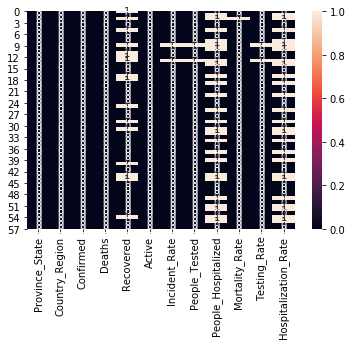

In [229]:
# Heat Map to show the Null values.
sns.heatmap(df_covid1.isnull(),annot=True)

So, we can see clearly see that  there are some null values in our dataset. We will check for the correlation metrix before treating the Null values

In [230]:
df_covid1.corr()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.982191,0.876856,0.985218,0.711776,0.828022,0.989936,0.383425,0.334032,0.327376
Deaths,0.982191,1.000000,0.856295,0.954378,0.712117,0.741730,0.992313,0.427721,0.345441,0.325817
Recovered,0.876856,0.856295,1.000000,0.809437,0.592014,0.950785,0.962082,0.362330,0.252155,0.302197
Active,0.985218,0.954378,0.809437,1.000000,0.703931,0.829687,0.976456,0.368403,0.322773,0.332398
Incident_Rate,0.711776,0.712117,0.592014,0.703931,1.000000,0.441669,0.725370,0.373338,0.620621,0.258029
People_Tested,0.828022,0.741730,0.950785,0.829687,0.441669,1.000000,0.906210,0.231301,0.230753,0.356618
People_Hospitalized,0.989936,0.992313,0.962082,0.976456,0.725370,0.906210,1.000000,0.509658,0.331753,0.377586
Mortality_Rate,0.383425,0.427721,0.362330,0.368403,0.373338,0.231301,0.509658,1.000000,0.170587,0.687832
Testing_Rate,0.334032,0.345441,0.252155,0.322773,0.620621,0.230753,0.331753,0.170587,1.000000,-0.071766
Hospitalization_Rate,0.327376,0.325817,0.302197,0.332398,0.258029,0.356618,0.377586,0.687832,-0.071766,1.000000


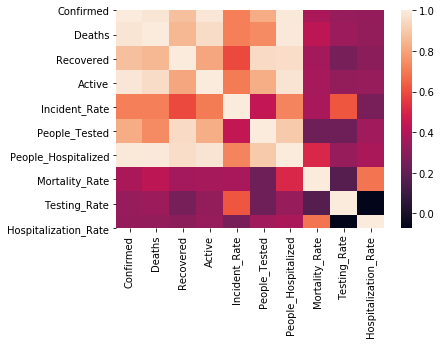

In [231]:
sns.heatmap(df_covid1.corr())

In [232]:
# Treating the Null values:
df_covid2=df_covid1.fillna(method='ffill',axis=1)
df_covid2.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,13052,522,522,12530,266.194,164450,1493,3.99939,3353.94,11.4389
1,Alaska,US,401,10,352,39,54.8155,37045,37045,2.49377,5063.94,5063.94
2,American Samoa,US,0,0,0,0,0,124,124,124,222.857,222.857
3,Arizona,US,14906,747,3773,10386,204.789,165435,1792,5.0114,2272.86,12.022
4,Arkansas,US,5003,107,3852,1044,165.783,96258,535,2.13872,3189.67,10.6936


In [233]:
df_covid2.shape

(58, 12)

In [234]:
df_covid3=df_covid1.dropna(subset=['Hospitalization_Rate','People_Hospitalized','Recovered','Incident_Rate','People_Tested','Testing_Rate'])
df_covid3.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
3,Arizona,US,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,US,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
6,Colorado,US,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774
7,Connecticut,US,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,5349.302875,28.054438
15,Hawaii,US,643,17,578.0,48.0,45.413710,46304.0,82.0,2.643857,3270.352122,12.752722


In [235]:
df_covid3.shape

(27, 12)

In [236]:
df_covid2.isnull().sum()

Province_State          0
Country_Region          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

We removed the Null value from  the given dataset.

We have 2 categorical featuires in our dataset. So, first we will change "Province State" and "Country_Region" into conrinuous variables.

In [237]:
df1=pd.get_dummies(df_covid3['Country_Region'])
df1.head()

,US
3,1
4,1
6,1
7,1
15,1


In [238]:
df2=pd.get_dummies(df_covid3['Province_State'],drop_first=True)
df2.head()

,Arkansas,Colorado,Connecticut,Hawaii,Idaho,Kansas,Kentucky,Maine,Maryland,Minnesota,...,Oklahoma,Oregon,Rhode Island,South Carolina,South Dakota,Tennessee,Utah,Virginia,Wisconsin,Wyoming
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
df_covid4=pd.concat([df1,df2,df_covid3],axis=1)
df_covid4.head()

,US,Arkansas,Colorado,Connecticut,Hawaii,Idaho,Kansas,Kentucky,Maine,Maryland,...,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
3,1,0,0,0,0,0,0,0,0,0,...,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,1,1,0,0,0,0,0,0,0,0,...,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
6,1,0,1,0,0,0,0,0,0,0,...,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774
7,1,0,0,1,0,0,0,0,0,0,...,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,5349.302875,28.054438
15,1,0,0,0,1,0,0,0,0,0,...,643,17,578.0,48.0,45.413710,46304.0,82.0,2.643857,3270.352122,12.752722


In [240]:
df_covid4.drop(['Country_Region','Province_State'],axis=1, inplace=True)

In [241]:
# Let us check the skewness in the given dataset

df_covid4.skew()

US                      0.000000
Arkansas                5.196152
Colorado                5.196152
Connecticut             5.196152
Hawaii                  5.196152
Idaho                   5.196152
Kansas                  5.196152
Kentucky                5.196152
Maine                   5.196152
Maryland                5.196152
Minnesota               5.196152
Mississippi             5.196152
Montana                 5.196152
New Hampshire           5.196152
New Mexico              5.196152
New York                5.196152
North Dakota            5.196152
Oklahoma                5.196152
Oregon                  5.196152
Rhode Island            5.196152
South Carolina          5.196152
South Dakota            5.196152
Tennessee               5.196152
Utah                    5.196152
Virginia                5.196152
Wisconsin               5.196152
Wyoming                 5.196152
Confirmed               4.965014
Deaths                  5.040241
Recovered               4.611075
Active    

There are some skewness in our dataset.
We will apply log transform method to normalize the skewness in the data

In [242]:
df_covid4.dtypes

US                        uint8
Arkansas                  uint8
Colorado                  uint8
Connecticut               uint8
Hawaii                    uint8
Idaho                     uint8
Kansas                    uint8
Kentucky                  uint8
Maine                     uint8
Maryland                  uint8
Minnesota                 uint8
Mississippi               uint8
Montana                   uint8
New Hampshire             uint8
New Mexico                uint8
New York                  uint8
North Dakota              uint8
Oklahoma                  uint8
Oregon                    uint8
Rhode Island              uint8
South Carolina            uint8
South Dakota              uint8
Tennessee                 uint8
Utah                      uint8
Virginia                  uint8
Wisconsin                 uint8
Wyoming                   uint8
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident

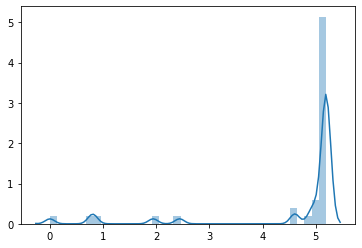

In [243]:
sns.distplot(df_covid4.skew())

In [2]:
# As per the graph,the data  is more skewed at 5.The normalization of the data is at 5.Still we will try to make some changes in the dataset. 

for col in df_covid4.columns:
    if df_covid4.skew().loc[col]>0.55:
        df_covid4[col]=np.log1p(df_covid4[col])
df_covid4.skew()

NameError: name 'df_covid4' is not defined

In [245]:
# We will check for the outliers in our dataset

# Applying IQR method to find the outliers

Q1=df_covid4.quantile(0.25)
Q3=df_covid4.quantile(0.75)

IQR=Q3-Q1

print(IQR)

US                      0.000000
Arkansas                0.000000
Colorado                0.000000
Connecticut             0.000000
Hawaii                  0.000000
Idaho                   0.000000
Kansas                  0.000000
Kentucky                0.000000
Maine                   0.000000
Maryland                0.000000
Minnesota               0.000000
Mississippi             0.000000
Montana                 0.000000
New Hampshire           0.000000
New Mexico              0.000000
New York                0.000000
North Dakota            0.000000
Oklahoma                0.000000
Oregon                  0.000000
Rhode Island            0.000000
South Carolina          0.000000
South Dakota            0.000000
Tennessee               0.000000
Utah                    0.000000
Virginia                0.000000
Wisconsin               0.000000
Wyoming                 0.000000
Confirmed               1.442616
Deaths                  2.048612
Recovered               1.348490
Active    

In [246]:
print(df_covid4 < (Q1-1.5*IQR)) 
print(df_covid4 > (Q3+1.5*IQR))

       US  Arkansas  Colorado  Connecticut  Hawaii  Idaho  Kansas  Kentucky  \
3   False     False     False        False   False  False   False     False   
4   False     False     False        False   False  False   False     False   
6   False     False     False        False   False  False   False     False   
7   False     False     False        False   False  False   False     False   
15  False     False     False        False   False  False   False     False   
16  False     False     False        False   False  False   False     False   
20  False     False     False        False   False  False   False     False   
21  False     False     False        False   False  False   False     False   
23  False     False     False        False   False  False   False     False   
24  False     False     False        False   False  False   False     False   
27  False     False     False        False   False  False   False     False   
28  False     False     False        False   False  

In [247]:
df_covid_out=df_covid4[~((df_covid4<(Q1-1.5*IQR)) | (df_covid4>(Q3+1.5*IQR)))]
print(df_covid4.shape)
print(df_covid_out.shape)

(27, 37)
(27, 37)


In [248]:
df_covid4.head()

,US,Arkansas,Colorado,Connecticut,Hawaii,Idaho,Kansas,Kentucky,Maine,Maryland,...,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
3,1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,9.609586,6.617403,8.235891,9.248310,5.326851,12.016340,7.491645,1.793658,7.729234,2.566641
4,1,0.693359,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,8.517993,4.682131,8.256607,6.951772,5.116692,11.474798,6.284134,1.143814,8.067986,2.459040
6,1,0.000000,0.693359,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,10.034428,7.170120,8.154500,9.799293,5.983604,11.789329,8.282989,1.901827,7.736455,2.909563
7,1,0.000000,0.000000,0.693359,0.000000,0.0,0.0,0.0,0.0,0.0,...,10.571778,8.169053,8.742734,10.282780,6.998836,12.158556,9.300821,2.307053,8.584908,3.369171
15,1,0.000000,0.000000,0.000000,0.693359,0.0,0.0,0.0,0.0,0.0,...,6.467699,2.890372,6.361302,3.891820,3.837595,10.743005,4.418841,1.293043,8.092959,2.621237


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CB5D86788>,
      dtype=object)

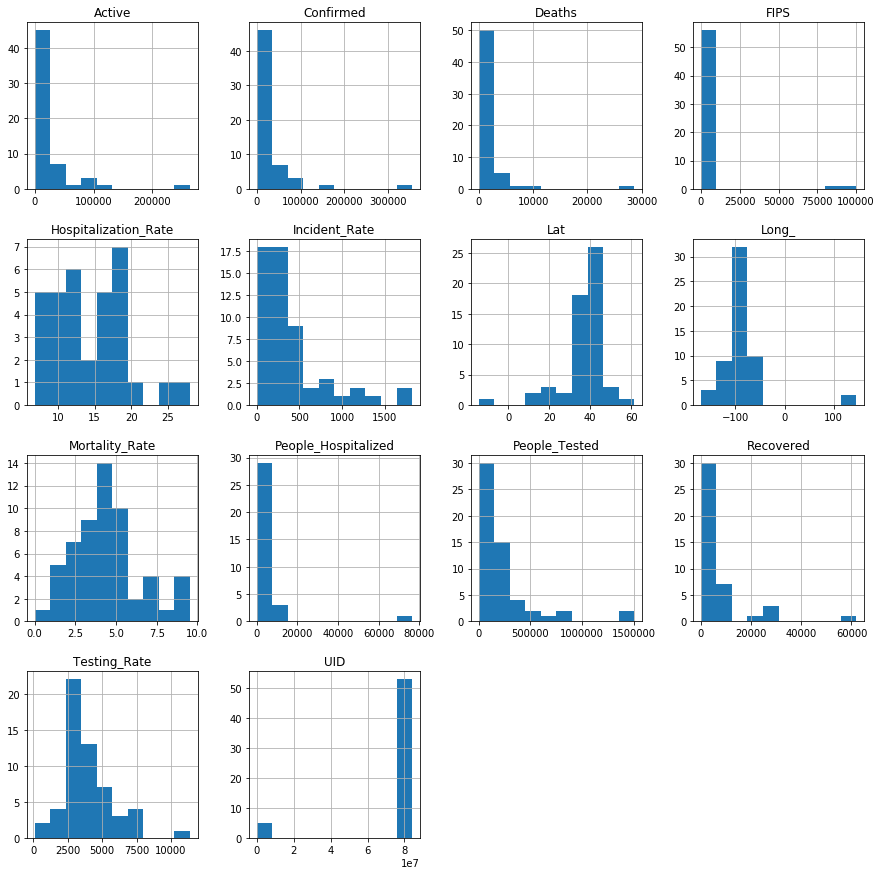

In [249]:
df_covid.hist(figsize=(15,15))

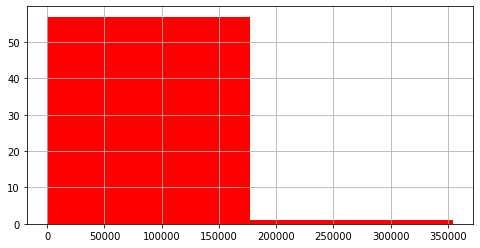

In [250]:
df_covid['Confirmed'].hist(bins=2,color='red',figsize=(8,4))

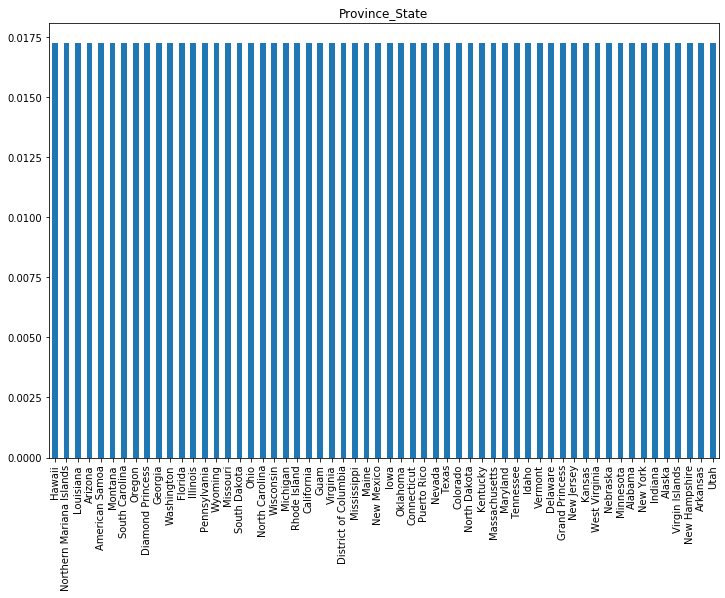

In [251]:
df_covid['Province_State'].value_counts(normalize=True).plot.bar(figsize=(12,8),title='Province_State')
plt.show()

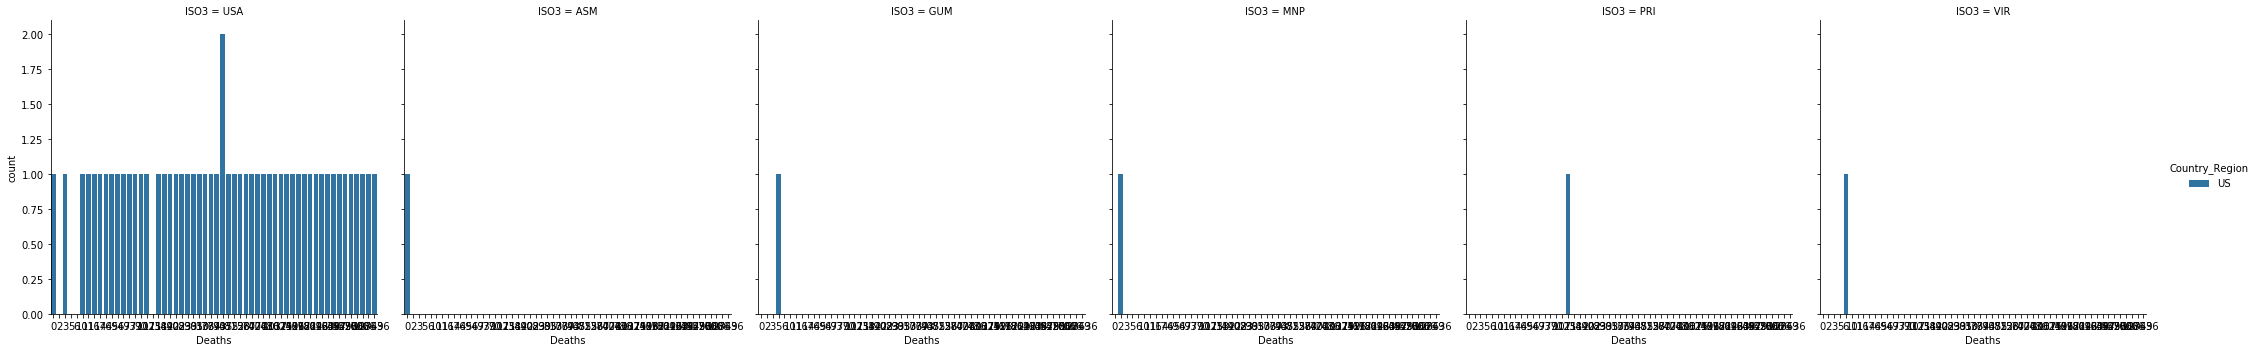

In [252]:
sns.catplot(x='Deaths',hue='Country_Region',
           kind='count',col='ISO3',data=df_covid)

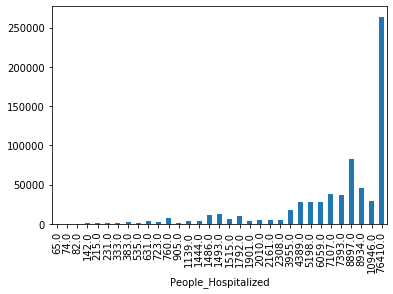

In [253]:
df_covid.groupby('People_Hospitalized')['Active'].mean().plot.bar()

# Predictive Modeling

For our dataset we have to predict the model score  based on two outputs - Deaths and Recovered
    
Let us create Two models for each Output.

# Model-1

for Deaths:

In [292]:
# Let us seprate the input and output from dataset

X1=df_covid4.drop(['Deaths'],axis=1)
Y1=df_covid4.iloc[:,-9]
print(X1)
print(Y1)

    US  Arkansas  Colorado  Connecticut    Hawaii     Idaho    Kansas  \
3    1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
4    1  0.693359  0.000000     0.000000  0.000000  0.000000  0.000000   
6    1  0.000000  0.693359     0.000000  0.000000  0.000000  0.000000   
7    1  0.000000  0.000000     0.693359  0.000000  0.000000  0.000000   
15   1  0.000000  0.000000     0.000000  0.693359  0.000000  0.000000   
16   1  0.000000  0.000000     0.000000  0.000000  0.693359  0.000000   
20   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.693359   
21   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
23   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
24   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
27   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
28   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
30   1  0.000000  0.000000     0.000000  0.000000  

In [255]:
from sklearn.preprocessing import StandardScaler

Standsc=StandardScaler()
X1=Standsc.fit_transform(X1)

In [272]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X1,Y1):
    max_r_score=0
    for r_state in range(42,100):
        X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,random_state=r_state,test_size=0.20)
        regr.fit(X1_train,Y1_train)
        Y1_pred=regr.predict(X1_test)
        r2_scr=r2_score(Y1_test,Y1_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print("max r2 score corresponding to", final_r_state,"is",max_r_score)
        return final_r_state

In [273]:
#Let us use the Linear Regression model and check the r2_score with different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state =maxr2_score(lreg,X1,Y1)

r2 score corresponding to  42 is 0.9022339531714411
max r2 score corresponding to 42 is 0.9022339531714411


Using GridSearchCV for best parameters for maxr2_score

In [274]:
#Let us recheck the values of max r2_score with Grid Search CV for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,24)}
knr=KNeighborsRegressor()
Gknr=GridSearchCV(knr,neighbors,cv=10)
Gknr.fit(X1,Y1)
Gknr.best_params_

{'n_neighbors': 5}

 By using Grid Search CV, we are getting the best parameter for KNN Regression.The best r2_score will be at n_neighbor =5

In [275]:
#Using KNN Regression for maxr2_score with n_neighbors= 5
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,X1,Y1)

r2 score corresponding to  42 is 0.9061178509807472
max r2 score corresponding to 42 is 0.9061178509807472


Verifying the maxr2_score  with Linear Regression and KNN Regression model with Cross_Val_Score

In [276]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression model:",cross_val_score(lreg,X1,Y1,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,X1,Y1,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,X1,Y1,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression:",cross_val_score(knr,X1,Y1,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression model: 0.8486174345008134
standard deviation in r2 score for Linear Regression: 0.10078726138516138

Mean r2 score for KNN Regression: 0.7133836787306846
standard deviation in r2 score for KNN Regression: 0.08201207105510049


The best r2 score(mean) for Linear Regression is 84% 

In [277]:
# Let us check the Lasso Regression for the best alpha value
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X1,Y1)
clf.best_params_

{'alpha': 0.01}

In [278]:
# Let us check the max r2 score with Lasso Regression

lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,X1,Y1)

r2 score corresponding to  42 is 0.9973984457438653
max r2 score corresponding to 42 is 0.9973984457438653


In [279]:
# We will cross verify the r2 score for Lasso with Cross Val Score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,X1,Y1,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression:",cross_val_score(lsreg,X1,Y1,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 0.9978225681174793
standard deviation in r2 score for Lasso Regression: 0.0025065837501635694


In [280]:
# We will use the Gradient Boosting Technique
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr, parameters,cv=5)
clf.fit(X1,Y1)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [286]:
# Using Cross Val Score to cross verify the mean r2 score and stamdrad deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
print("Mean r2 Score for gradient boosting Regression:",cross_val_score(gbr,X1,Y1,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression:",cross_val_score(gbr,X1,Y1,cv=5,scoring="r2").std())

Mean r2 Score for gradient boosting Regression: 0.7107007851109094
standard deviation in r2 score for gradient boosting Regression: 0.3090867019257774


In [287]:
# Now let us use ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(X1,Y1)
clf.best_params_

{'base_estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 1,
 'n_estimators': 500}

In [289]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=1,n_estimators=500)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,X1,Y1,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting regression:",cross_val_score(ada_reg,X1,Y1,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: 0.9970837865324844
standard deviation in r2 score for ada boosting regression: 0.0040261840777195915


In [290]:
# maximum r2 score for  ada boost regression :
r_state=maxr2_score(ada_reg,X1,Y1)

r2 score corresponding to  42 is 0.9962589347376417
max r2 score corresponding to 42 is 0.9962589347376417


As per the above observation, after applying the various Regression Models to our dataset . We concluded that Lasso is the best Regressor with the maximum r2 score.

So we will use the Lasso regressor and AdaBoost  for our model to  get the bets prediction score.

Conclusion: - the Death count from Covid disease can easly be predicted with the testing rate,active cases , recovered and treatment rate with 99.78% of probability.

# Model-2

-for Recovered Paitents :

In [297]:
# Let us create split the dataset for Training and Testing 

X2=df_covid4.drop(['Recovered'],axis=1)
Y2=df_covid4.iloc[:,-8]
print(X2)
print(Y2)

    US  Arkansas  Colorado  Connecticut    Hawaii     Idaho    Kansas  \
3    1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
4    1  0.693359  0.000000     0.000000  0.000000  0.000000  0.000000   
6    1  0.000000  0.693359     0.000000  0.000000  0.000000  0.000000   
7    1  0.000000  0.000000     0.693359  0.000000  0.000000  0.000000   
15   1  0.000000  0.000000     0.000000  0.693359  0.000000  0.000000   
16   1  0.000000  0.000000     0.000000  0.000000  0.693359  0.000000   
20   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.693359   
21   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
23   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
24   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
27   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
28   1  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000   
30   1  0.000000  0.000000     0.000000  0.000000  

We will apply the Regression models to check for the best prediction score for our given dataset.

In [299]:
#Let us Scale the Input variables 
from sklearn.preprocessing import StandardScaler

Standsc=StandardScaler()
X2=Standsc.fit_transform(X2)

In [300]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X2,Y2):
    max_r_score=0
    for r_state in range(42,100):
        X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,random_state=r_state,test_size=0.20)
        regr.fit(X2_train,Y2_train)
        Y2_pred=regr.predict(X2_test)
        r2_scr=r2_score(Y2_test,Y2_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print("max r2 score corresponding to", final_r_state,"is",max_r_score)
        return final_r_state

In [301]:
#Let us use the Linear Regression model and check the r2_score with different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state =maxr2_score(lreg,X2,Y2)

r2 score corresponding to  42 is 0.1942096374796516
max r2 score corresponding to 42 is 0.1942096374796516


In [302]:
#Let us recheck the values of max r2_score with Grid Search CV for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,24)}
knr=KNeighborsRegressor()
Gknr=GridSearchCV(knr,neighbors,cv=10)
Gknr.fit(X2,Y2)
Gknr.best_params_

{'n_neighbors': 14}

In [305]:
#Using KNN Regression for maxr2_score with n_neighbors= 5
knr=KNeighborsRegressor(n_neighbors=14)
r_state=maxr2_score(knr,X2,Y2)

r2 score corresponding to  42 is 0.2500658606282563
max r2 score corresponding to 42 is 0.2500658606282563


In [306]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression model:",cross_val_score(lreg,X2,Y2,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,X2,Y2,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,X2,Y2,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression:",cross_val_score(knr,X2,Y2,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression model: 0.30742606656943006
standard deviation in r2 score for Linear Regression: 0.566245794508094

Mean r2 score for KNN Regression: 0.14315224266706614
standard deviation in r2 score for KNN Regression: 0.25474848999518285


In [307]:
# Let us check the Lasso Regression for the best alpha value
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X2,Y2)
clf.best_params_

{'alpha': 0.1}

In [311]:
# Let us check the max r2 score with Lasso Regression

lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,X2,Y2)

r2 score corresponding to  42 is 0.0025204240152965074
max r2 score corresponding to 42 is 0.0025204240152965074


In [312]:
# We will cross verify the r2 score for Lasso with Cross Val Score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,X2,Y2,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression:",cross_val_score(lsreg,X2,Y2,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: 0.35983017323252436
standard deviation in r2 score for Lasso Regression: 0.4581625505038808


In [313]:
# We will use the Gradient Boosting Technique
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr, parameters,cv=5)
clf.fit(X2,Y2)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 1000}

In [321]:
# Using Cross Val Score to cross verify the mean r2 score and stamdrad deviation
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=1000)
print("Mean r2 Score for gradient boosting Regression:",cross_val_score(gbr,X2,Y2,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression:",cross_val_score(gbr,X2,Y2,cv=5,scoring="r2").std())

Mean r2 Score for gradient boosting Regression: -0.100325296698718
standard deviation in r2 score for gradient boosting Regression: 0.6708600857907165


In [322]:
# Now let us use ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(X2,Y2)
clf.best_params_

{'base_estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 1,
 'n_estimators': 100}

In [323]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=1,n_estimators=100)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,X2,Y2,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting regression:",cross_val_score(ada_reg,X2,Y2,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: 0.3573049332762757
standard deviation in r2 score for ada boosting regression: 0.3358929205256063


In [324]:
# maximum r2 score for  ada boost regression :
r_state=maxr2_score(ada_reg,X2,Y2)

r2 score corresponding to  42 is 0.29466395478144336
max r2 score corresponding to 42 is 0.29466395478144336


The best r2 score for the given Test model is through Adaboost Regressor.

So we have the maximum predictive probability for our dataset for "recovered" target is around 67.

We wil use this outcome tp predict the future input data.

In [325]:
from sklearn.externals import joblib

joblib.dump(r_state,'covid.pkl')

['covid.pkl']